# XBeach data source demo

Usage demo for the source objects

### Requirements

- Clone and install the [main](https://github.com/rom-py/rompy-xbeach) version of rompy-xbeach

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import numpy as np
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy.crs as ccrs

from rompy_xbeach.source import SourceCRSFile, SourceCRSIntake, SourceCRSDataset, SourceGeotiff, SourceXYZ

import warnings
warnings.filterwarnings("ignore")

/home/rguedes/.virtualenvs/xbeach/lib/python3.10/site-packages/pyschism/forcing/hycom/gofs.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw


## XBeach source

Source objects in rompy-xbeach are an extension of the [core sources](https://github.com/rom-py/rompy/blob/main/rompy/core/source.py)
available in rompy with support to coordinate reference system (CRS): the `._open()` method must return an
xarray Dataset object with the `rio` accessor available and the `crs` attribute set.

Three modified source objects are available in rompy-xbeach, `SourceCRSFile`, `SourceCRSIntake` and `SourceCRSDataset`.
They are similar to their core counterparts but requite a CRS field to be provided.

### SourceCRSFile

Can be used with any file format on disk supported by xarray

In [3]:
from rompy_xbeach.source import SourceCRSFile

# Assumes rompy-xbeach is cloned in the same parent directory as rompy-notebooks
source = SourceCRSFile(
    uri="../../../rompy-xbeach/tests/data/bathy.nc",
    kwargs=dict(engine="netcdf"),
    crs="EPSG:4326",
    x_dim="x",
    y_dim="y",
)

ds = source._open()
ds

<xarray.Dataset> Size: 130kB
Dimensions:      (x: 176, y: 180)
Coordinates:
  * x            (x) float64 1kB 115.6 115.6 115.6 115.6 ... 115.6 115.6 115.6
  * y            (y) float64 1kB -32.65 -32.65 -32.65 ... -32.61 -32.61 -32.61
    spatial_ref  int64 8B 0
Data variables:
    depth        (y, x) float32 127kB ...

In [4]:
ds.rio.crs

CRS.from_epsg(4326)

### SourceCRSIntake

Intake based source with CRS support

In [5]:
from rompy_xbeach.source import SourceCRSIntake

source = SourceCRSIntake(
    catalog_uri="../../../rompy-xbeach/tests/data/catalog.yaml",
    dataset_id="bathy_netcdf",
    crs="EPSG:4326",
)

### SourceCRSDataset

Allow using an existing xarray object

In [6]:
from rompy_xbeach.source import SourceCRSDataset

source = SourceCRSDataset(obj=ds, crs="EPSG:4326")

### SourceGeotiff

Geotiff files have typically have the CRS information available, a special Source is available to easily use these files

In [7]:
from rompy_xbeach.source import SourceGeotiff

source = SourceGeotiff(filename="../../../rompy-xbeach/tests/data/bathy.tif")
source

SourceGeotiff(model_type='geotiff', filename='../../../rompy-xbeach/tests/data/bathy.tif', band=1, kwargs={})

### SourceXYZ

Define a source from XYZ, point-cloud file. Parameters for opening the file with pandas
and to interpolate into a regular grid with scipy can be prescribed in this source

In [8]:
from rompy_xbeach.source import SourceXYZ

source = SourceXYZ(
    filename="../../../rompy-xbeach/tests/data/bathy_xyz.zip",
    res=0.0005,
    read_csv_kwargs=dict(sep="\t"),
    griddata_kwargs=dict(method="linear"),
    xcol="easting",
    ycol="northing",
    zcol="elevation",
    crs="EPSG:4326",
)
source

SourceXYZ(model_type='xyz', filename='../../../rompy-xbeach/tests/data/bathy_xyz.zip', crs='EPSG:4326', res=0.0005, xcol='easting', ycol='northing', zcol='elevation', read_csv_kwargs={'sep': '\t'}, griddata_kwargs={'method': 'linear'})

In [9]:
ds = source._open()
ds

INFO:rompy_xbeach.source:Interpolating onto a grid of shape (78, 76)


<xarray.Dataset> Size: 49kB
Dimensions:      (y: 78, x: 76)
Coordinates:
  * y            (y) float64 624B -32.65 -32.65 -32.65 ... -32.61 -32.61 -32.61
  * x            (x) float64 608B 115.6 115.6 115.6 115.6 ... 115.6 115.6 115.6
    spatial_ref  int64 8B 0
Data variables:
    z            (y, x) float64 47kB -13.21 -13.19 -13.28 -13.17 ... nan nan nan

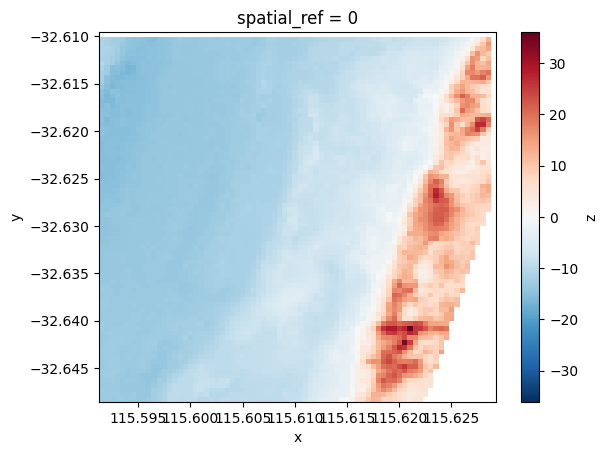

In [10]:
ds.z.plot()